# ٍSurvival Analysis

## Table of Contents: 
### Preface
### A. Sort out Samples
### B. Apply the clustering techniques (KMeans Silhouette Score)

## Preface

## 1. Import necessary libraries:

In [2]:
import os # for the directory 
import csv # reading files
import pandas as pd  # data analysis tools
import numpy as np
import re
from pandas import DataFrame # easier to analysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
fname=r"C:\Users\mohab\gdc_download_PhiSci" # locate the location 
os.chdir(r"C:\Users\mohab\gdc_download_PhiSci") # assign the default work folder 
list_names = os.listdir(fname) # to include all files into one list variable

## 2. Import the transfered file produced earlier using log2 transformations:

In [3]:
# the first file we need to select genes from
finalTable = pd.read_csv('Final_table_Z_scored_row.csv')

## 3. Explore Dataframe file

In [4]:
print(type(finalTable))

<class 'pandas.core.frame.DataFrame'>


In [5]:
finalTable.head()

,Unnamed: 0,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,TCGA-J2-8192-01A,-0.568761,-1.070652,-0.000209,-0.632171,-0.574220,-0.605328,0.329137,0.245862,-0.648731,...,0.664966,0.913596,0.253424,0.304465,1.096347,-0.096078,0.413155,-1.636936,-0.865418,-0.707259
1,TCGA-75-5122-01A,0.347796,-0.112235,-0.066612,0.135094,0.694573,0.143373,0.285649,1.527693,-0.368996,...,0.110362,1.719899,0.047876,0.724598,1.181421,-0.472159,0.490767,1.223121,-0.482075,0.783945
2,TCGA-91-A4BC-01A,1.237028,-0.036417,-1.687601,0.486004,0.136036,0.368781,0.581189,1.406005,0.375244,...,0.025699,-0.708260,-0.579221,0.431322,0.106887,1.104589,1.809240,-1.657951,0.074829,0.869725
3,TCGA-49-6745-01A,-0.299578,1.864399,0.084959,-1.630829,0.038267,0.310276,0.131954,0.001749,-1.005530,...,-1.820587,0.652831,1.079814,-0.771728,-0.013832,0.043986,0.122951,0.977896,-0.206475,0.893509
4,TCGA-44-2665-11A,-0.124086,-0.617624,0.178915,-0.261310,-0.965601,0.402554,-0.468792,0.725871,-0.724025,...,0.134010,0.706875,0.119108,0.498407,-0.383715,0.565645,-0.464232,0.609198,0.072073,0.158626


In [6]:
finalTable.shape

(593, 5431)

## A. Sort out Samples 

### A.1 Change column name to patients

In [7]:
# change unnamed column to a "Patients" column 
finalTable.rename( columns={'Unnamed: 0':'Patients'}, inplace=True )
cols = list(finalTable.columns)
finalTable[cols].head()

,Patients,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,TCGA-J2-8192-01A,-0.568761,-1.070652,-0.000209,-0.632171,-0.574220,-0.605328,0.329137,0.245862,-0.648731,...,0.664966,0.913596,0.253424,0.304465,1.096347,-0.096078,0.413155,-1.636936,-0.865418,-0.707259
1,TCGA-75-5122-01A,0.347796,-0.112235,-0.066612,0.135094,0.694573,0.143373,0.285649,1.527693,-0.368996,...,0.110362,1.719899,0.047876,0.724598,1.181421,-0.472159,0.490767,1.223121,-0.482075,0.783945
2,TCGA-91-A4BC-01A,1.237028,-0.036417,-1.687601,0.486004,0.136036,0.368781,0.581189,1.406005,0.375244,...,0.025699,-0.708260,-0.579221,0.431322,0.106887,1.104589,1.809240,-1.657951,0.074829,0.869725
3,TCGA-49-6745-01A,-0.299578,1.864399,0.084959,-1.630829,0.038267,0.310276,0.131954,0.001749,-1.005530,...,-1.820587,0.652831,1.079814,-0.771728,-0.013832,0.043986,0.122951,0.977896,-0.206475,0.893509
4,TCGA-44-2665-11A,-0.124086,-0.617624,0.178915,-0.261310,-0.965601,0.402554,-0.468792,0.725871,-0.724025,...,0.134010,0.706875,0.119108,0.498407,-0.383715,0.565645,-0.464232,0.609198,0.072073,0.158626


In [8]:
finalTable.shape

(593, 5431)

### A.2 Keeping all solid tumour tissues only (ending by 01) 

In [9]:
finalTable = pd.DataFrame(finalTable[finalTable['Patients'].str.contains(r'-01(?!$)')])
finalTable.head()

,Patients,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,TCGA-J2-8192-01A,-0.568761,-1.070652,-0.000209,-0.632171,-0.574220,-0.605328,0.329137,0.245862,-0.648731,...,0.664966,0.913596,0.253424,0.304465,1.096347,-0.096078,0.413155,-1.636936,-0.865418,-0.707259
1,TCGA-75-5122-01A,0.347796,-0.112235,-0.066612,0.135094,0.694573,0.143373,0.285649,1.527693,-0.368996,...,0.110362,1.719899,0.047876,0.724598,1.181421,-0.472159,0.490767,1.223121,-0.482075,0.783945
2,TCGA-91-A4BC-01A,1.237028,-0.036417,-1.687601,0.486004,0.136036,0.368781,0.581189,1.406005,0.375244,...,0.025699,-0.708260,-0.579221,0.431322,0.106887,1.104589,1.809240,-1.657951,0.074829,0.869725
3,TCGA-49-6745-01A,-0.299578,1.864399,0.084959,-1.630829,0.038267,0.310276,0.131954,0.001749,-1.005530,...,-1.820587,0.652831,1.079814,-0.771728,-0.013832,0.043986,0.122951,0.977896,-0.206475,0.893509
5,TCGA-64-1681-01A,-1.090608,-0.368778,-0.160844,-0.908411,0.130199,0.206905,2.306982,1.483484,0.146550,...,1.088048,-0.315372,-1.075384,0.795102,0.829340,-0.613728,0.815180,0.049344,0.382056,-0.463254


In [10]:
finalTable.shape

(532, 5431)

In [11]:
#to convert the output Data Frame Table to a correponding CSV format
finalTable.to_csv(r'Final_table_no_median.csv', index = False)

In [51]:
# Read the corresponding CSV file we need to select genes from
finalTable = pd.read_csv('Final_table_no_median.csv')
finalTable.head()

,Patients,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,TCGA-J2-8192-01A,-0.568761,-1.070652,-0.000209,-0.632171,-0.574220,-0.605328,0.329137,0.245862,-0.648731,...,0.664966,0.913596,0.253424,0.304465,1.096347,-0.096078,0.413155,-1.636936,-0.865418,-0.707259
1,TCGA-75-5122-01A,0.347796,-0.112235,-0.066612,0.135094,0.694573,0.143373,0.285649,1.527693,-0.368996,...,0.110362,1.719899,0.047876,0.724598,1.181421,-0.472159,0.490767,1.223121,-0.482075,0.783945
2,TCGA-91-A4BC-01A,1.237028,-0.036417,-1.687601,0.486004,0.136036,0.368781,0.581189,1.406005,0.375244,...,0.025699,-0.708260,-0.579221,0.431322,0.106887,1.104589,1.809240,-1.657951,0.074829,0.869725
3,TCGA-49-6745-01A,-0.299578,1.864399,0.084959,-1.630829,0.038267,0.310276,0.131954,0.001749,-1.005530,...,-1.820587,0.652831,1.079814,-0.771728,-0.013832,0.043986,0.122951,0.977896,-0.206475,0.893509
4,TCGA-64-1681-01A,-1.090608,-0.368778,-0.160844,-0.908411,0.130199,0.206905,2.306982,1.483484,0.146550,...,1.088048,-0.315372,-1.075384,0.795102,0.829340,-0.613728,0.815180,0.049344,0.382056,-0.463254


### A.2 Grouping all similar patients together, removing the last digits

In [45]:
# split patient ID into a list, exclude the last digits
finalTable['Patients']=finalTable['Patients'].apply(lambda x: x.split("-")[:3])
#combine all lists values into a single string
finalTable['Patients'] = finalTable['Patients'].apply(lambda x: ''.join(x))
finalTable.head()

,Patients,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,TCGAJ28192,-0.568761,-1.070652,-0.000209,-0.632171,-0.574220,-0.605328,0.329137,0.245862,-0.648731,...,0.664966,0.913596,0.253424,0.304465,1.096347,-0.096078,0.413155,-1.636936,-0.865418,-0.707259
1,TCGA755122,0.347796,-0.112235,-0.066612,0.135094,0.694573,0.143373,0.285649,1.527693,-0.368996,...,0.110362,1.719899,0.047876,0.724598,1.181421,-0.472159,0.490767,1.223121,-0.482075,0.783945
2,TCGA91A4BC,1.237028,-0.036417,-1.687601,0.486004,0.136036,0.368781,0.581189,1.406005,0.375244,...,0.025699,-0.708260,-0.579221,0.431322,0.106887,1.104589,1.809240,-1.657951,0.074829,0.869725
3,TCGA496745,-0.299578,1.864399,0.084959,-1.630829,0.038267,0.310276,0.131954,0.001749,-1.005530,...,-1.820587,0.652831,1.079814,-0.771728,-0.013832,0.043986,0.122951,0.977896,-0.206475,0.893509
4,TCGA641681,-1.090608,-0.368778,-0.160844,-0.908411,0.130199,0.206905,2.306982,1.483484,0.146550,...,1.088048,-0.315372,-1.075384,0.795102,0.829340,-0.613728,0.815180,0.049344,0.382056,-0.463254


### A.3 Summarizing replicats with median values

In [47]:
# find the median values of all replicates rows (patients)
finalTable = finalTable.groupby(['Patients']).median()

In [48]:
finalTable.head()

,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,ENSG00000179833,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
Patients,,,,,,,,,,,,,,,,,,,,,
TCGA054244,0.589114,1.003665,-0.048534,-1.013633,-0.499692,-0.087478,-0.391675,0.877901,-0.136574,1.193198,...,0.115143,0.947719,-0.666491,-0.079637,-0.190571,-0.853176,1.066205,1.054552,-0.385172,-0.662107
TCGA054249,0.336812,0.584443,-0.868243,-1.302287,-0.770021,-1.043345,-0.803281,-0.830437,-0.350080,-0.113202,...,-2.441444,0.319628,-0.563266,-0.621155,-0.907976,1.212749,0.511445,0.707088,1.079129,0.000597
TCGA054250,-0.095578,2.070690,-0.080474,-0.750315,0.943487,0.065604,-0.236112,1.444375,-2.121779,-0.081538,...,-1.032840,0.998781,0.103940,0.008959,-0.118967,-1.726892,1.242704,-0.037235,-0.687928,-1.010352
TCGA054382,-1.025727,0.070446,-0.155905,-1.582172,1.073434,-0.816411,0.138105,0.496662,-0.685795,0.236620,...,0.574486,0.451952,-0.258683,-0.114534,-0.615276,-0.553858,0.493738,-0.247060,-1.593753,0.013734
TCGA054384,1.654415,0.033384,1.336560,0.382178,0.165434,-1.015725,-0.028534,-1.206722,-1.645633,-0.432786,...,0.323376,-0.595971,0.455942,0.061927,-1.115623,-0.471615,-0.261625,0.136249,-1.401781,0.168867


In [49]:
finalTable.shape

(512, 5430)

In [50]:
#to convert the output Data Frame Table to a correponding CSV format
finalTable.to_csv(r'Final_table_with_grouped_patient.csv', index = True)

In [132]:
# the first file we need to select genes from
finalTable = pd.read_csv('Final_table_with_grouped_patient.csv')
finalTable.head()

,Patients,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,TCGA054244,0.589114,1.003665,-0.048534,-1.013633,-0.499692,-0.087478,-0.391675,0.877901,-0.136574,...,0.115143,0.947719,-0.666491,-0.079637,-0.190571,-0.853176,1.066205,1.054552,-0.385172,-0.662107
1,TCGA054249,0.336812,0.584443,-0.868243,-1.302287,-0.770021,-1.043345,-0.803281,-0.830437,-0.350080,...,-2.441444,0.319628,-0.563266,-0.621155,-0.907976,1.212749,0.511445,0.707088,1.079129,0.000597
2,TCGA054250,-0.095578,2.070690,-0.080474,-0.750315,0.943487,0.065604,-0.236112,1.444375,-2.121779,...,-1.032840,0.998781,0.103940,0.008959,-0.118967,-1.726892,1.242704,-0.037235,-0.687928,-1.010352
3,TCGA054382,-1.025727,0.070446,-0.155905,-1.582172,1.073434,-0.816411,0.138105,0.496662,-0.685795,...,0.574486,0.451952,-0.258683,-0.114534,-0.615276,-0.553858,0.493738,-0.247060,-1.593753,0.013734
4,TCGA054384,1.654415,0.033384,1.336560,0.382178,0.165434,-1.015725,-0.028534,-1.206722,-1.645633,...,0.323376,-0.595971,0.455942,0.061927,-1.115623,-0.471615,-0.261625,0.136249,-1.401781,0.168867


### B. Apply the clustering techniques (KMeans Silhouette Score)

In [134]:
# extract all columns 
cols = list(finalTable.columns)
# exclude the Patients column
cols.remove('Patients')
finalTable[cols].head()

,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,ENSG00000179833,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,0.589114,1.003665,-0.048534,-1.013633,-0.499692,-0.087478,-0.391675,0.877901,-0.136574,1.193198,...,0.115143,0.947719,-0.666491,-0.079637,-0.190571,-0.853176,1.066205,1.054552,-0.385172,-0.662107
1,0.336812,0.584443,-0.868243,-1.302287,-0.770021,-1.043345,-0.803281,-0.830437,-0.350080,-0.113202,...,-2.441444,0.319628,-0.563266,-0.621155,-0.907976,1.212749,0.511445,0.707088,1.079129,0.000597
2,-0.095578,2.070690,-0.080474,-0.750315,0.943487,0.065604,-0.236112,1.444375,-2.121779,-0.081538,...,-1.032840,0.998781,0.103940,0.008959,-0.118967,-1.726892,1.242704,-0.037235,-0.687928,-1.010352
3,-1.025727,0.070446,-0.155905,-1.582172,1.073434,-0.816411,0.138105,0.496662,-0.685795,0.236620,...,0.574486,0.451952,-0.258683,-0.114534,-0.615276,-0.553858,0.493738,-0.247060,-1.593753,0.013734
4,1.654415,0.033384,1.336560,0.382178,0.165434,-1.015725,-0.028534,-1.206722,-1.645633,-0.432786,...,0.323376,-0.595971,0.455942,0.061927,-1.115623,-0.471615,-0.261625,0.136249,-1.401781,0.168867


### B.1. Applying plain Kmeans to the dataframe

In [135]:
# Find Kmeans for all z-scored normalization
kmeans = KMeans(n_clusters=4)
kmeans.fit(finalTable[cols].values)
y_kmeans = kmeans.predict(finalTable[cols])
y_kmeans

array([2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 3, 2, 2, 2,
       1, 2, 3, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 1, 1, 3, 2, 3, 1, 2,
       1, 3, 2, 2, 2, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 2, 2,
       3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 3, 0, 0, 3, 0, 0, 0, 1,
       2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2, 2,
       2, 1, 2, 1, 3, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 2, 1, 3, 3, 2, 2, 2, 1, 1, 2, 3, 3, 1, 2, 2, 2, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 1, 3, 3, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 3, 1, 3, 1, 1, 3, 2, 3, 3, 2, 3, 1, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 3, 2, 2, 1, 2,
       2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 1, 3, 2,

### B.2. Choosing the Appropriate Number of Clusters using Silhouette Method

In [136]:
range_n_clusters = list (range(2,10))
score_s = []
i = 0
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(finalTable[cols])
    centers = clusterer.cluster_centers_
    score = silhouette_score(finalTable[cols], preds)
    #score_s[i] = score
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    #i+=1

For n_clusters = 2, silhouette score is 0.07659420733783187
For n_clusters = 3, silhouette score is 0.08495058148630863
For n_clusters = 4, silhouette score is 0.05697495042604296
For n_clusters = 5, silhouette score is 0.043911840150385004
For n_clusters = 6, silhouette score is 0.04008603282737346
For n_clusters = 7, silhouette score is 0.045068400327254385
For n_clusters = 8, silhouette score is 0.037217942787433525
For n_clusters = 9, silhouette score is 0.040359843474313


### B.3. Using Yellowbrick to extends the Scikit-Learn API

# To install yellowbrick package follow the following steps:

## 1. Open the anaconda prompt

## 2. To install it write in anaconda prompt
## conda install -c districtdatalabs yellowbrick

###  Side notes: Yellowbrick is a suite of visual diagnostic tools called "Visualizers" that extend the scikit-learn API to allow human steering of the model selection process. In a nutshell, Yellowbrick combines scikit-learn with matplotlib in the best tradition of the scikit-learn documentation, but to produce visualizations for your machine learning workflow!

### reference: https://github.com/DistrictDataLabs/yellowbrick

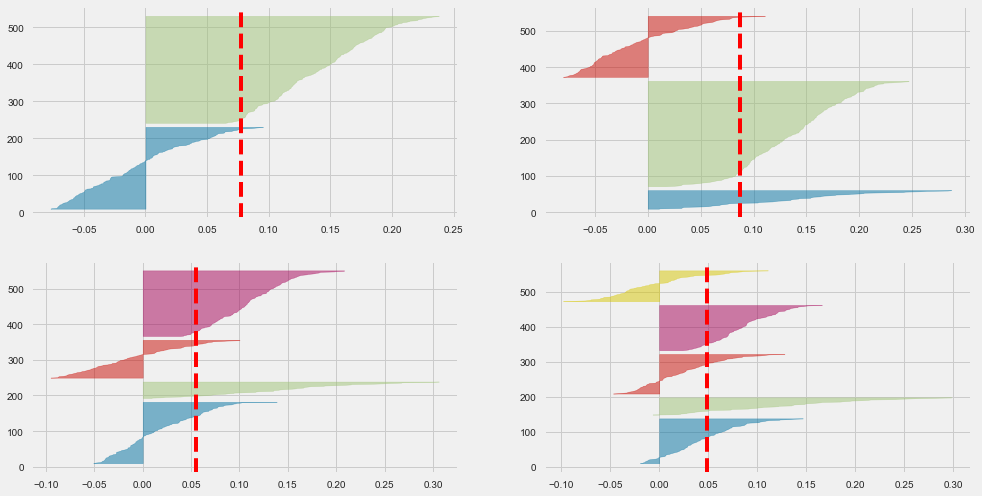

In [137]:
# import the Yellowbrick 
from yellowbrick.cluster import SilhouetteVisualizer

# plot using the best four silhouettee scores [2, 3, 4, 5]
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    # Create SilhouetteVisualizer instance with KMeans instance 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    #Fit the visualizer
    visualizer.fit(finalTable[cols])

### B.4. Save the file to .CSV format

In [138]:
#to convert the output Data Frame Table to a correponding CSV format
finalTable.to_csv(r'Final_table_Silhouette_col.csv', index = True)